In [172]:
import pandas as pd
import numpy as np
from plotnine import *

# Task 1

**Getting the q1data**

In [441]:
d1 = pd.read_csv('/Users/benji/Documents/Machine Learning/Data/q1data.csv')
d1

,income,life_exp,population,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,1910.0,61.0,29200000.0,2010,Afghanistan,asia,south_asia,asia_west,South Asia
1,11100.0,78.1,2950000.0,2010,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,11100.0,74.7,36000000.0,2010,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,46900.0,81.9,84500.0,2010,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
4,7680.0,60.8,23400000.0,2010,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
192,20400.0,75.4,28400000.0,2010,Venezuela,americas,america,america_south,Latin America & Caribbean
193,5350.0,73.3,88000000.0,2010,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
194,4700.0,67.8,23200000.0,2010,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
195,3200.0,57.5,13600000.0,2010,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


**Removing the null values**

In [265]:
d1.dropna(inplace = True)

**Data Info**

In [266]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191 entries, 0 to 196
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   income             191 non-null    float64
 1   life_exp           191 non-null    float64
 2   population         191 non-null    float64
 3   year               191 non-null    int64  
 4   country            191 non-null    object 
 5   four_regions       191 non-null    object 
 6   six_regions        191 non-null    object 
 7   eight_regions      191 non-null    object 
 8   world_bank_region  191 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 14.9+ KB


**Plotting the graph**

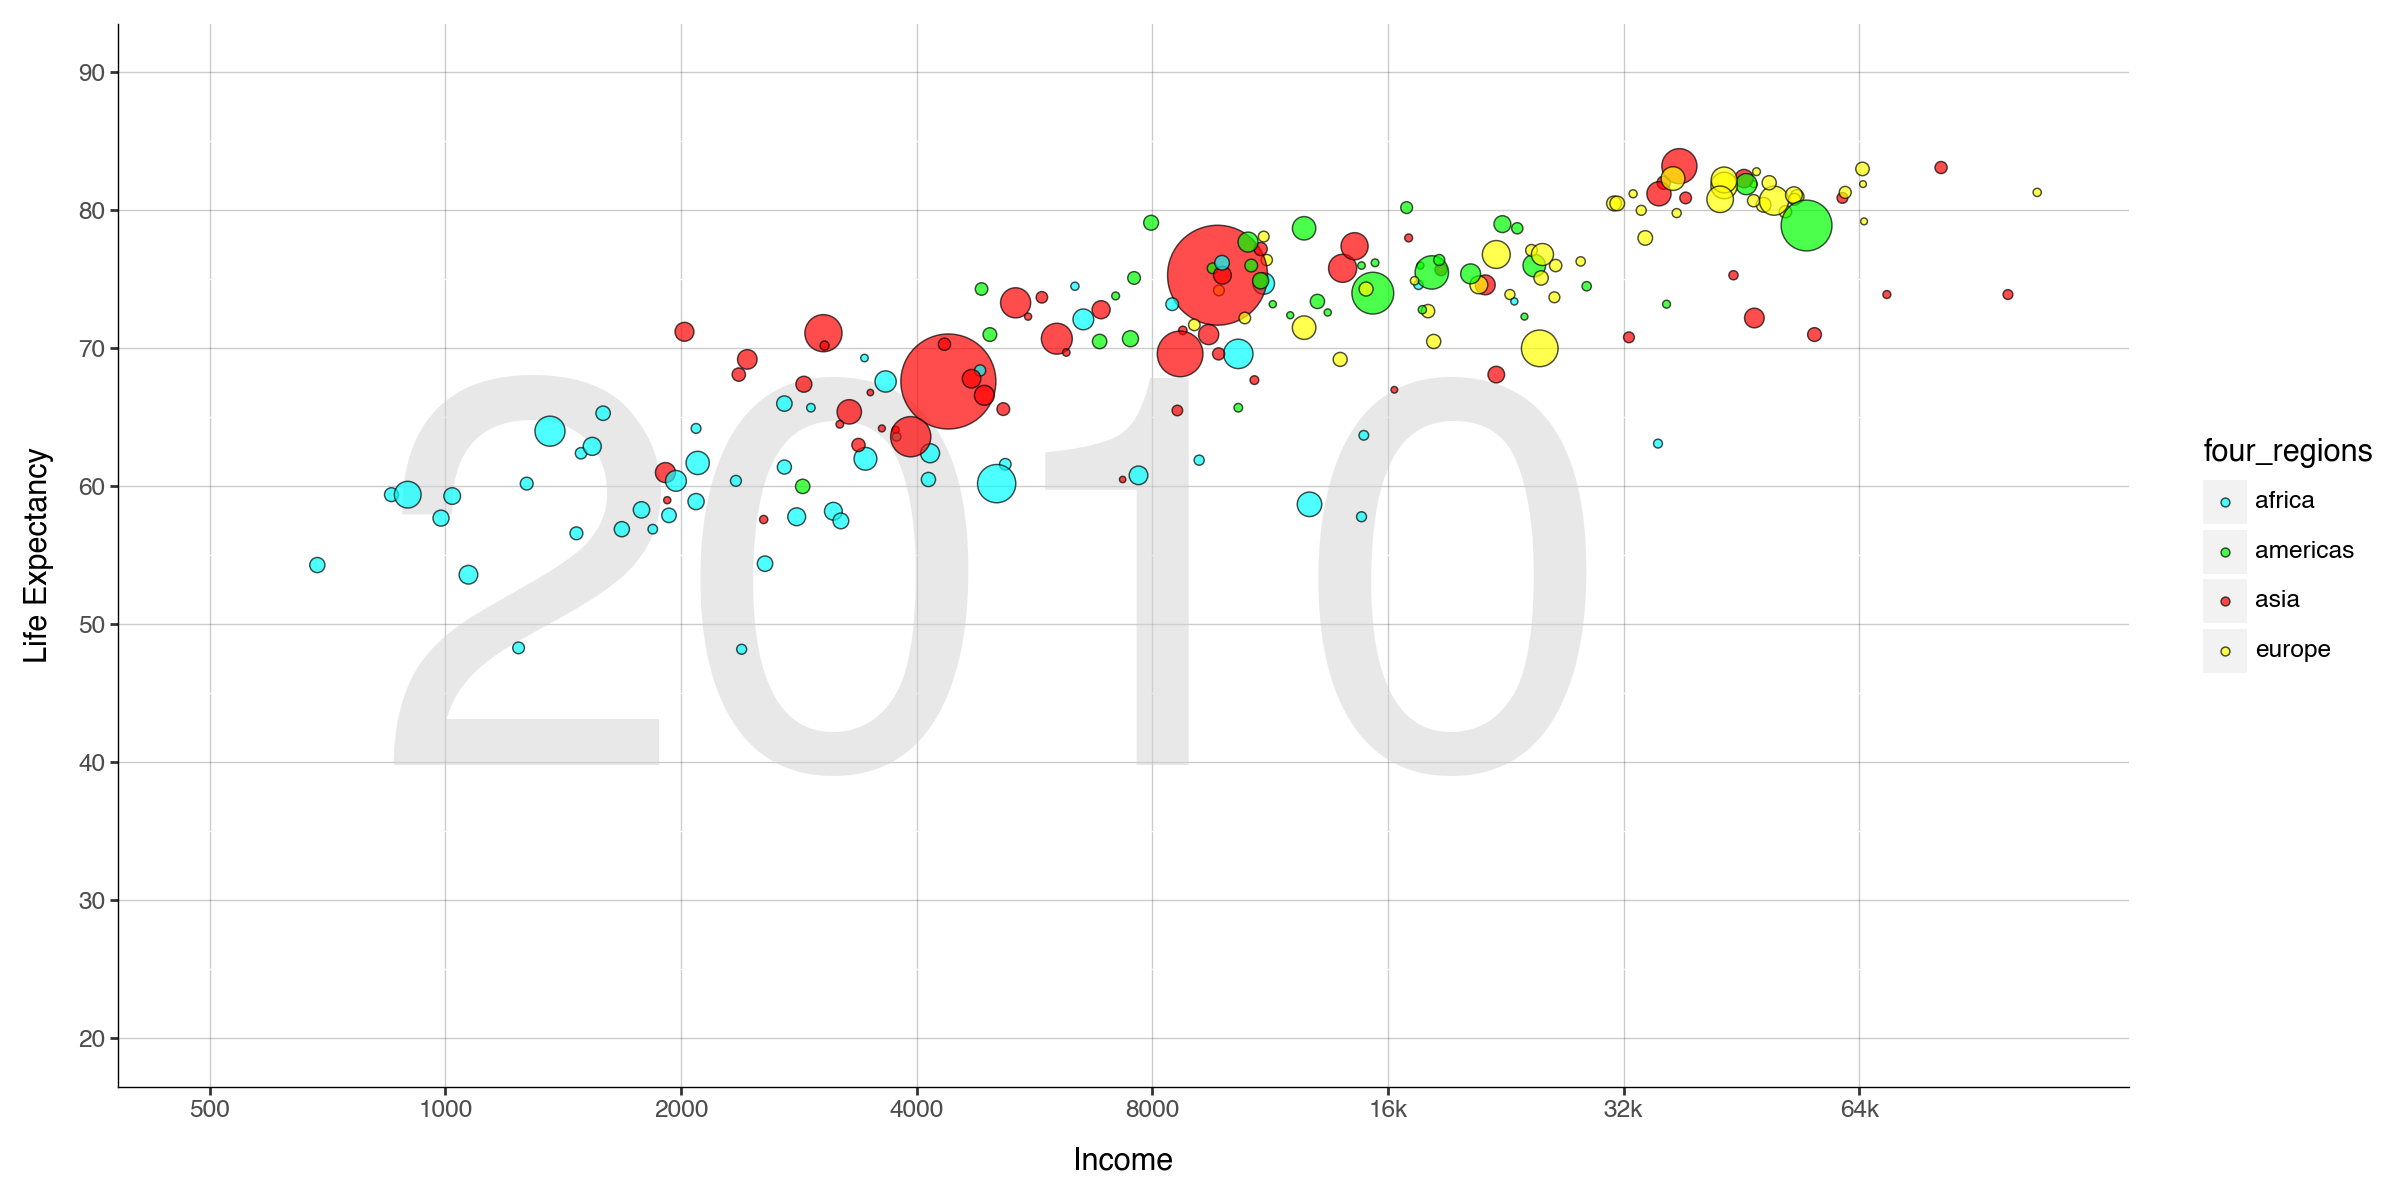

In [440]:
x_breaks = [500, 1000, 2000, 4000, 8000, 16000, 32000, 64000]
x_labels = ["500", "1000", "2000", "4000", "8000", "16k", "32k", "64k"]

color_mapping = {
    'asia': 'red',     
    'africa': 'aqua',   
    'americas': 'lime', 
    'europe': 'yellow'  
}

(ggplot(d1, aes(x='income', y='life_exp', size='population', fill='four_regions')) +
                annotate('text', x=5000, y=50, label='2010', size=200, color='lightgray', alpha=0.5) +
                geom_point(alpha=0.7,stroke=0.3, color='black') +
                scale_fill_manual(values=color_mapping) + 
                scale_size(range=(1, 20)) + 
                scale_x_continuous(trans='log10',  # Set X-axis to logarithmic scale
                                   breaks=x_breaks,
                                   labels = x_labels,
                                   limits=(500, 108001)
                                
                                   )+
                scale_y_continuous(breaks = [20,30,40,50,60,70,80,90],
                    limits=(20, 90)) +  # Control the Y-axis limits

                guides(size=False) +

 # Control bubble size range
                labs(x="Income",
                     y="Life Expectancy",
                     size="Population",) +

                theme(
                    figure_size=(12, 6), 
                    panel_background=element_blank(),  # Remove the panel background
                    axis_line=element_line(color='black', size=0.5),
                    panel_grid_major_x= element_line(color='black', size=0.5, alpha = .2),
                    panel_grid_major_y=element_line(color='black', size=0.5, alpha = .2),
                    )
    )

### Alternative plot Idea

Other Possible graph could be line plot we can see the trend lines of life expentency with income. But interpreting the line plot is difficult for this particular datset. As geom_plot gives us more information reagarding the datset.

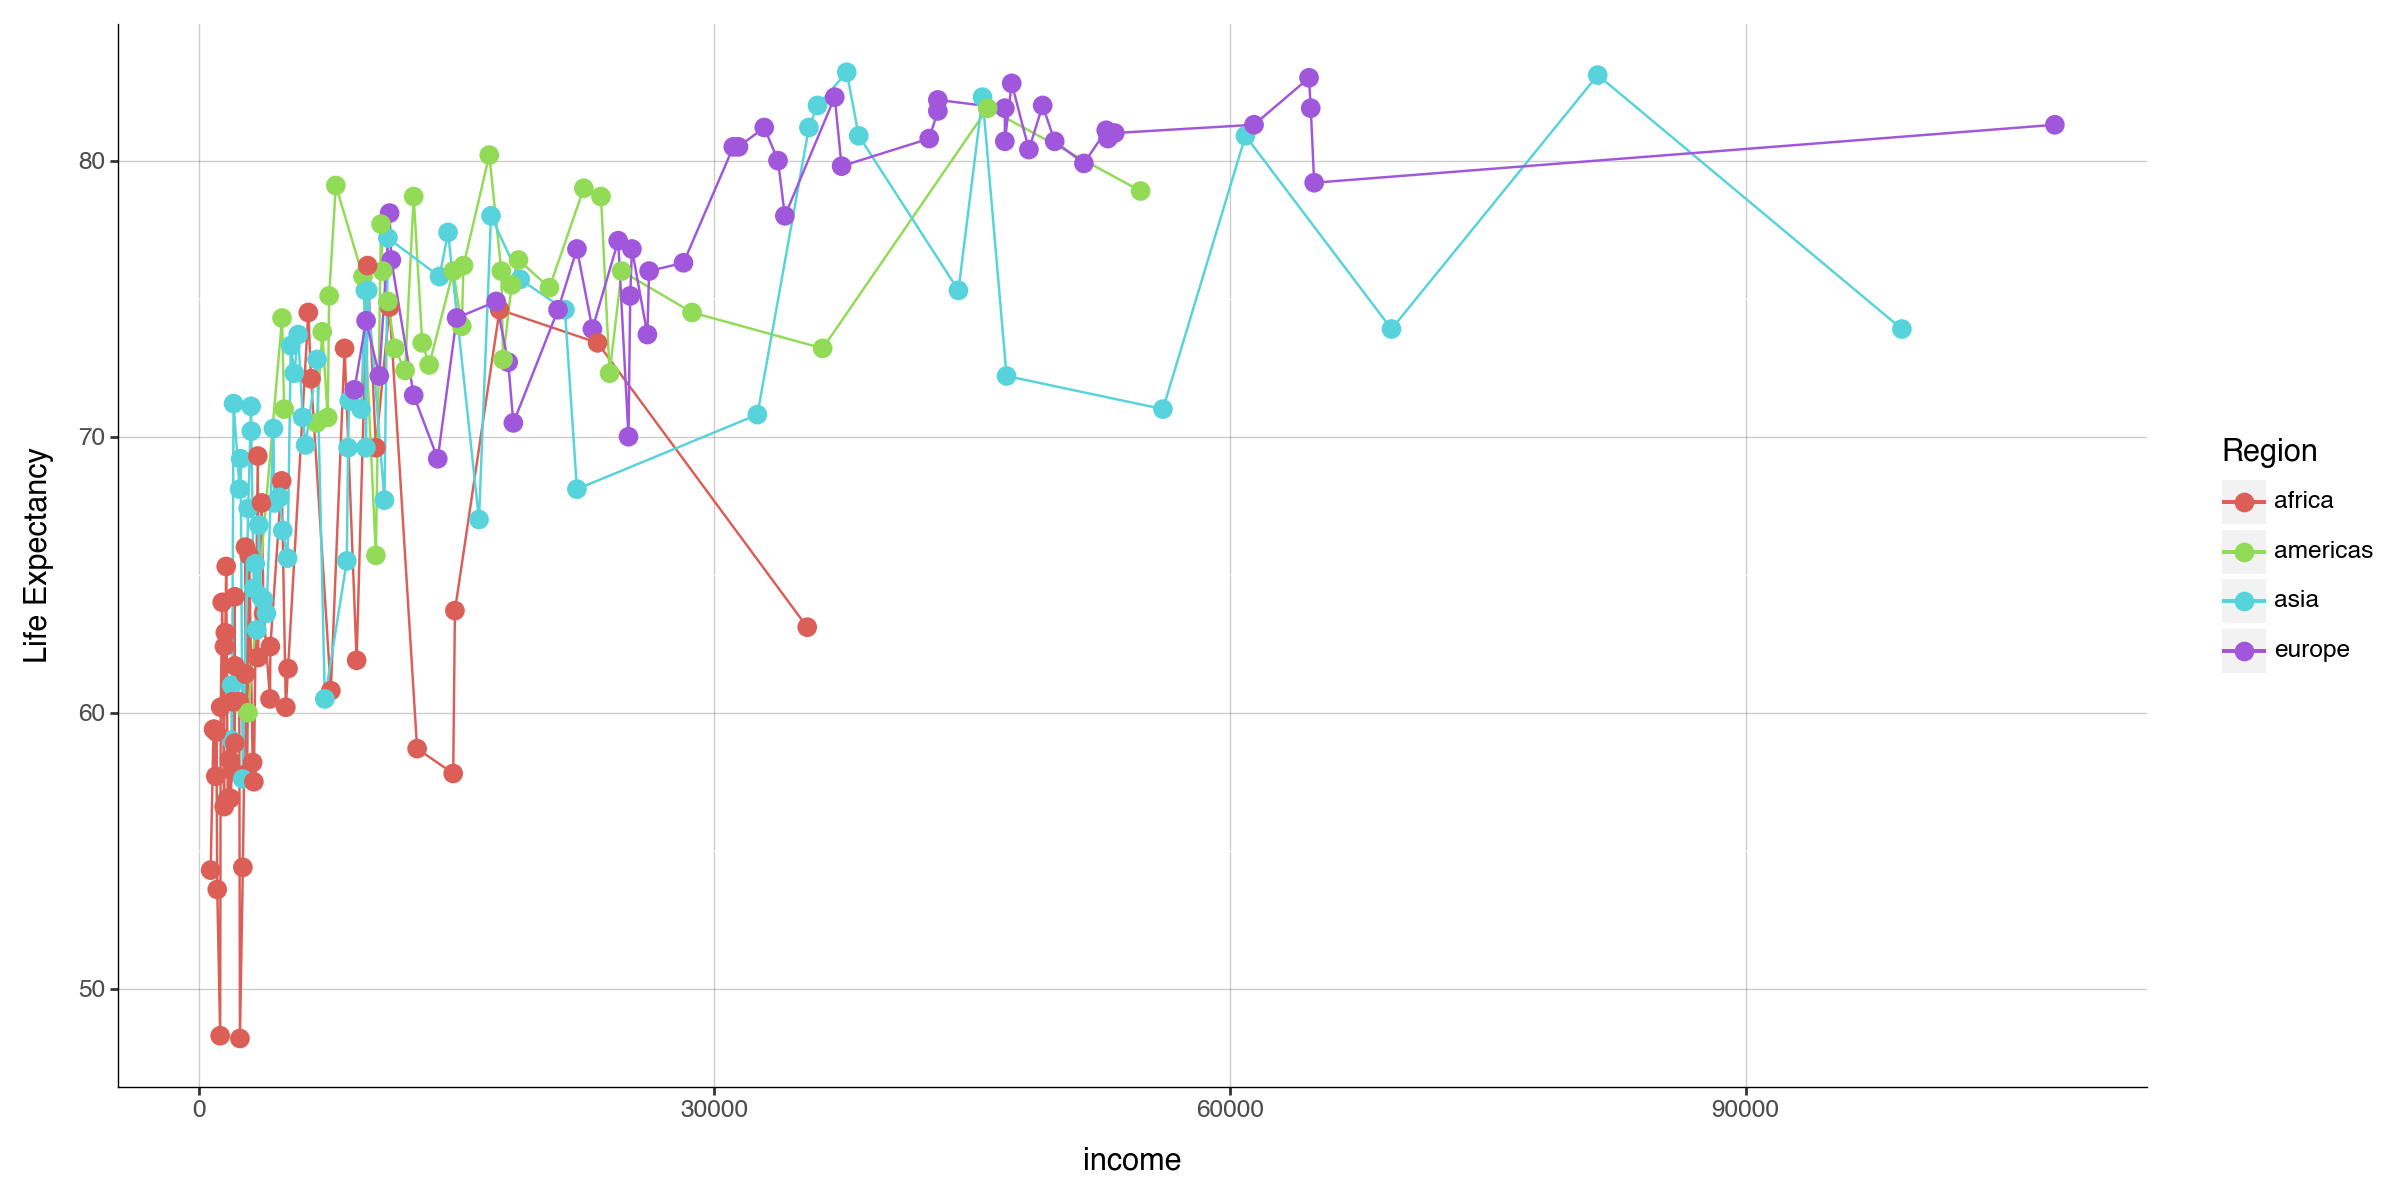

In [418]:
line_plot = (
    ggplot(d1, aes(x='income', y='life_exp',color='four_regions', group='four_regions')) +  # Grouping by Region for lines
    geom_line() +  # Add lines connecting points
    geom_point(size=3) +  # Add points for visibility
    
    labs(x='income',
         y='Life Expectancy',
         color='Region') +
    theme(
                    figure_size=(12, 6), 
                    panel_background=element_blank(),  # Remove the panel background
                    axis_line=element_line(color='black', size=0.5),
                    panel_grid_major_x= element_line(color='black', size=0.5, alpha = .2),
                    panel_grid_major_y=element_line(color='black', size=0.5, alpha = .2),
                    )
)

# Show the plot
line_plot.show()

# Task 2

**Getting the q2data**

In [442]:
d2 = pd.read_csv('/Users/benji/Documents/Machine Learning/Data/q2data.csv')
d2

,imports,exports,energy,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,NaN,NaN,NaN,1997,Afghanistan,asia,south_asia,asia_west,South Asia
1,36.7,11.5,427,1997,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,22.5,22.6,825,1997,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,NaN,NaN,1997,American Samoa,NaN,NaN,NaN,NaN
4,NaN,NaN,434,1997,Angola,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa
...,...,...,...,...,...,...,...,...,...
201,52.2,44.8,340,1997,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
202,NaN,NaN,NaN,1997,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
203,NaN,NaN,241,1997,Yemen,NaN,NaN,NaN,NaN
204,31.6,24.6,617,1997,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


**Removing the null values**

In [391]:
d2.dropna(inplace = True)

**Converting the string values to float**

In [393]:
def convert_to_float(value):
    if isinstance(value, str):
        if value.endswith('k'):
            return float(value[:-1]) * 1000  # Convert 'k' values
        else:
            return float(value)  # Convert regular strings
    return np.nan 
d2['energy'] = d2['energy'].apply(convert_to_float)
d2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 127 entries, 1 to 205
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   imports            127 non-null    float64
 1   exports            127 non-null    float64
 2   energy             127 non-null    float64
 3   year               127 non-null    int64  
 4   country            127 non-null    object 
 5   four_regions       127 non-null    object 
 6   six_regions        127 non-null    object 
 7   eight_regions      127 non-null    object 
 8   world_bank_region  127 non-null    object 
dtypes: float64(3), int64(1), object(5)
memory usage: 9.9+ KB


**Plotting the graph**

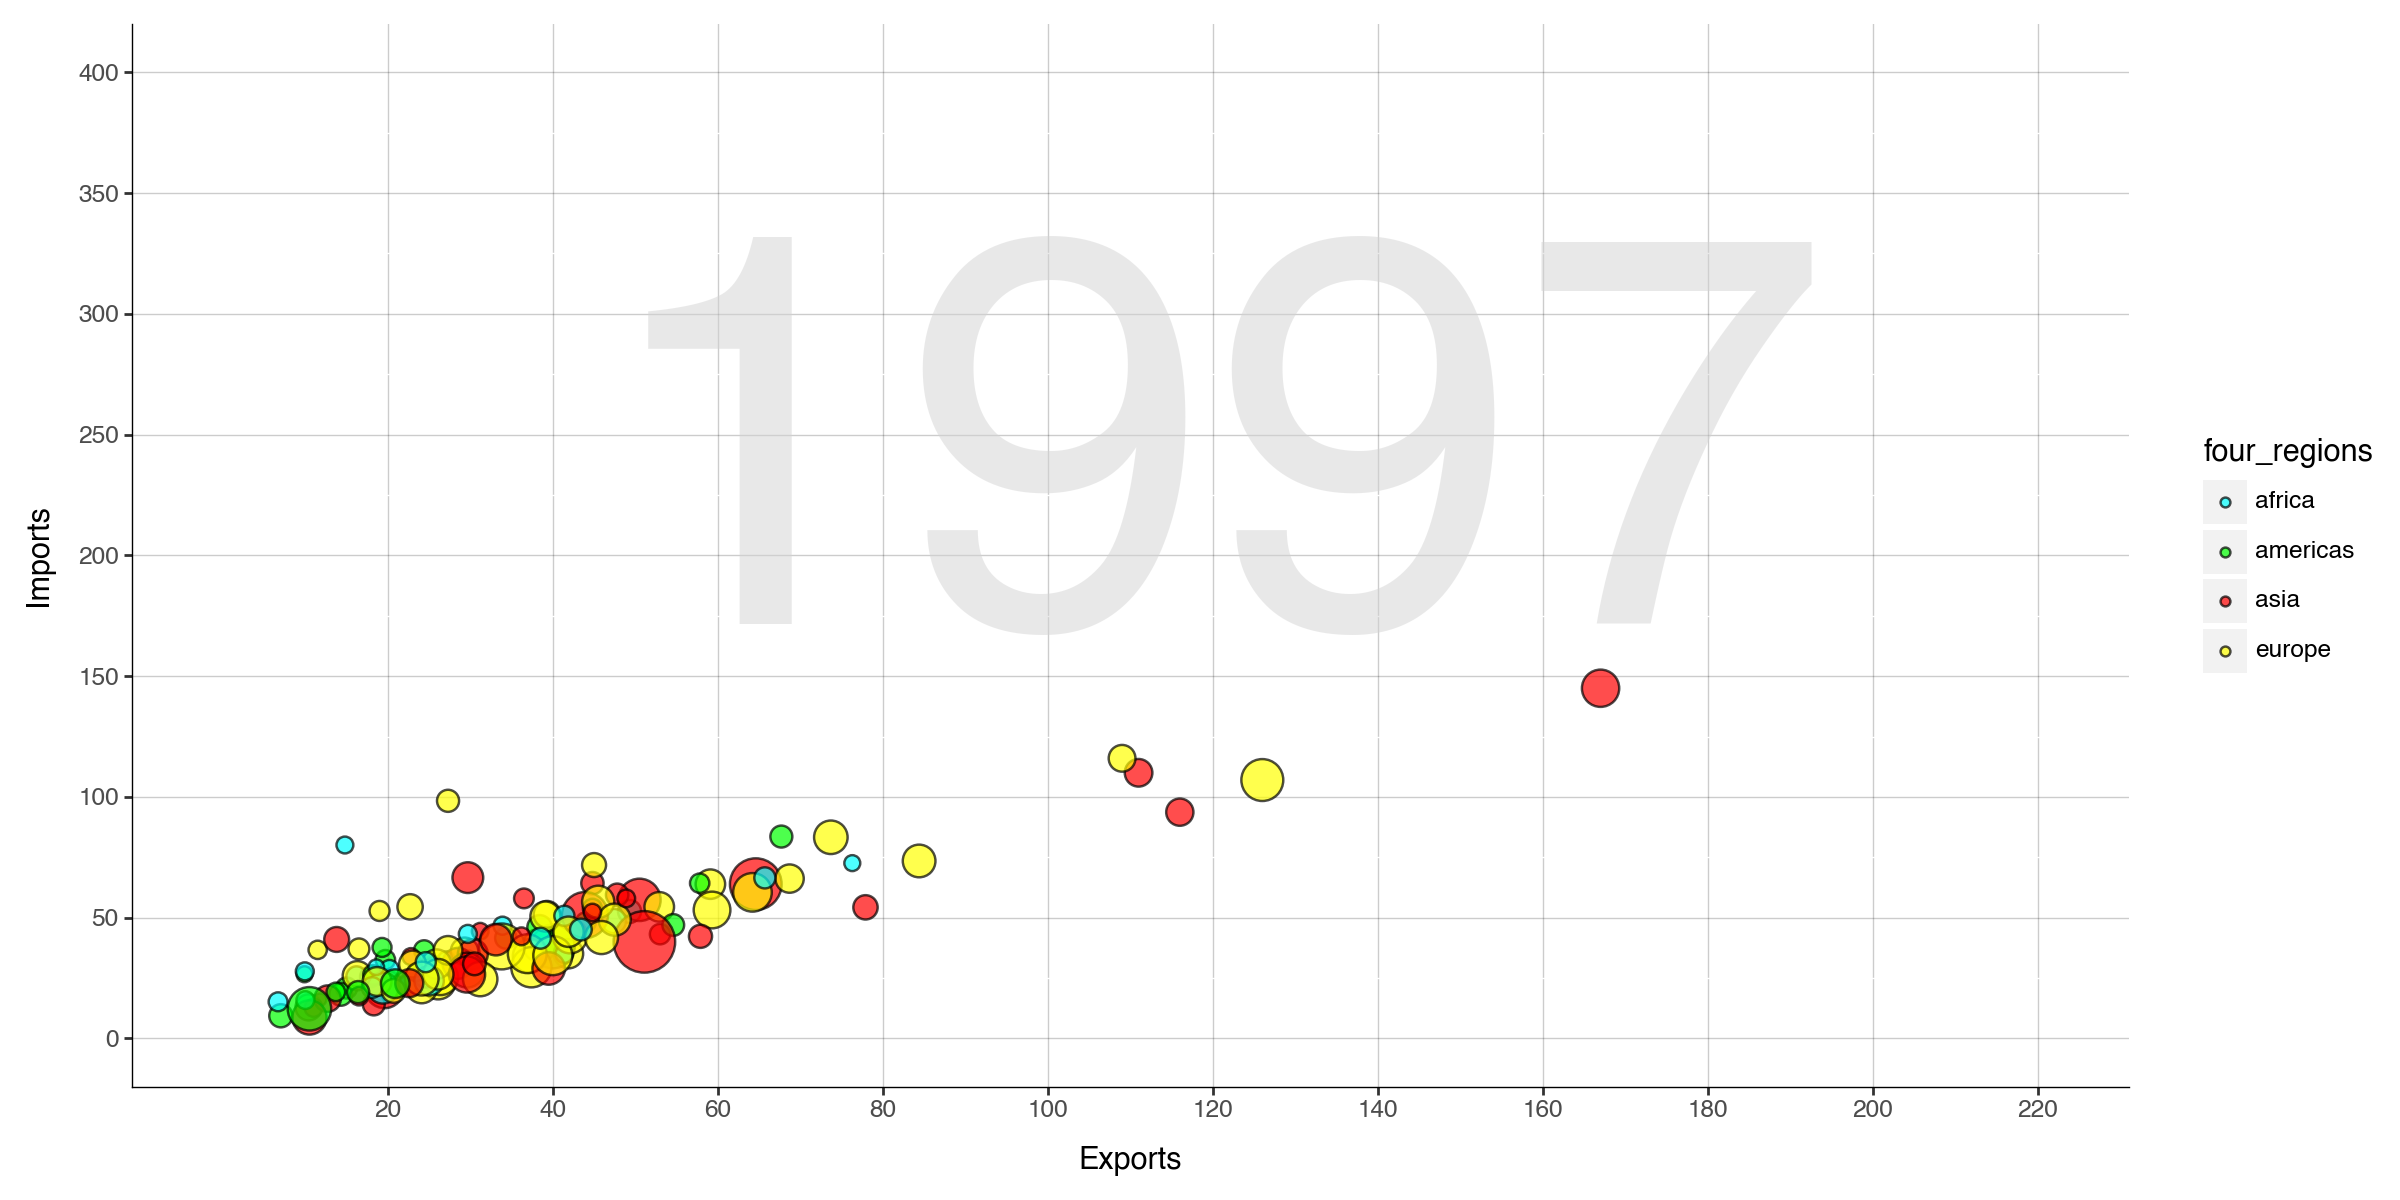

In [397]:
x_breaks = list(map(lambda x: x * 20, range(1, 13)))
y_breaks = list(map(lambda y: y * 50, range(0, 9)))


(ggplot(d2, aes(x='exports', y='imports', size='energy', fill='four_regions')) +
                annotate('text', x=120, y=230, label='1997', size=200, color='lightgray', alpha=0.5) +
                geom_point(alpha=0.7,stroke=0.5, color='black') +
                scale_fill_manual(values=color_mapping) + 
                scale_size(range=(2,12)) + 
                scale_x_continuous(breaks= x_breaks,
                                   limits=(0,220)
                                
                                   )+
                scale_y_continuous(breaks = y_breaks,
                    limits=(0, 400)) +  # Control the Y-axis limits

                guides(size=False) +

 # Control bubble size range
                labs(x="Exports",
                     y="Imports",
                     size="Population",
                     ) +
                # theme_minimal()+
                # theme(figure_size=(12, 6))
                theme(
                    figure_size=(12, 6), 
                    panel_background=element_blank(),  # Remove the panel background
                    axis_line=element_line(color='black', size=0.5),
                    panel_grid_major_x= element_line(color='black', size=0.5, alpha = .2),
                    panel_grid_major_y=element_line(color='black', size=0.5, alpha = .2),
                    )
    )

### Alternative plot Idea

For this task we can use geom_smooth with method as linear regression. We can use that to find the relation between imports and exports of the different regions of the world and compare them.

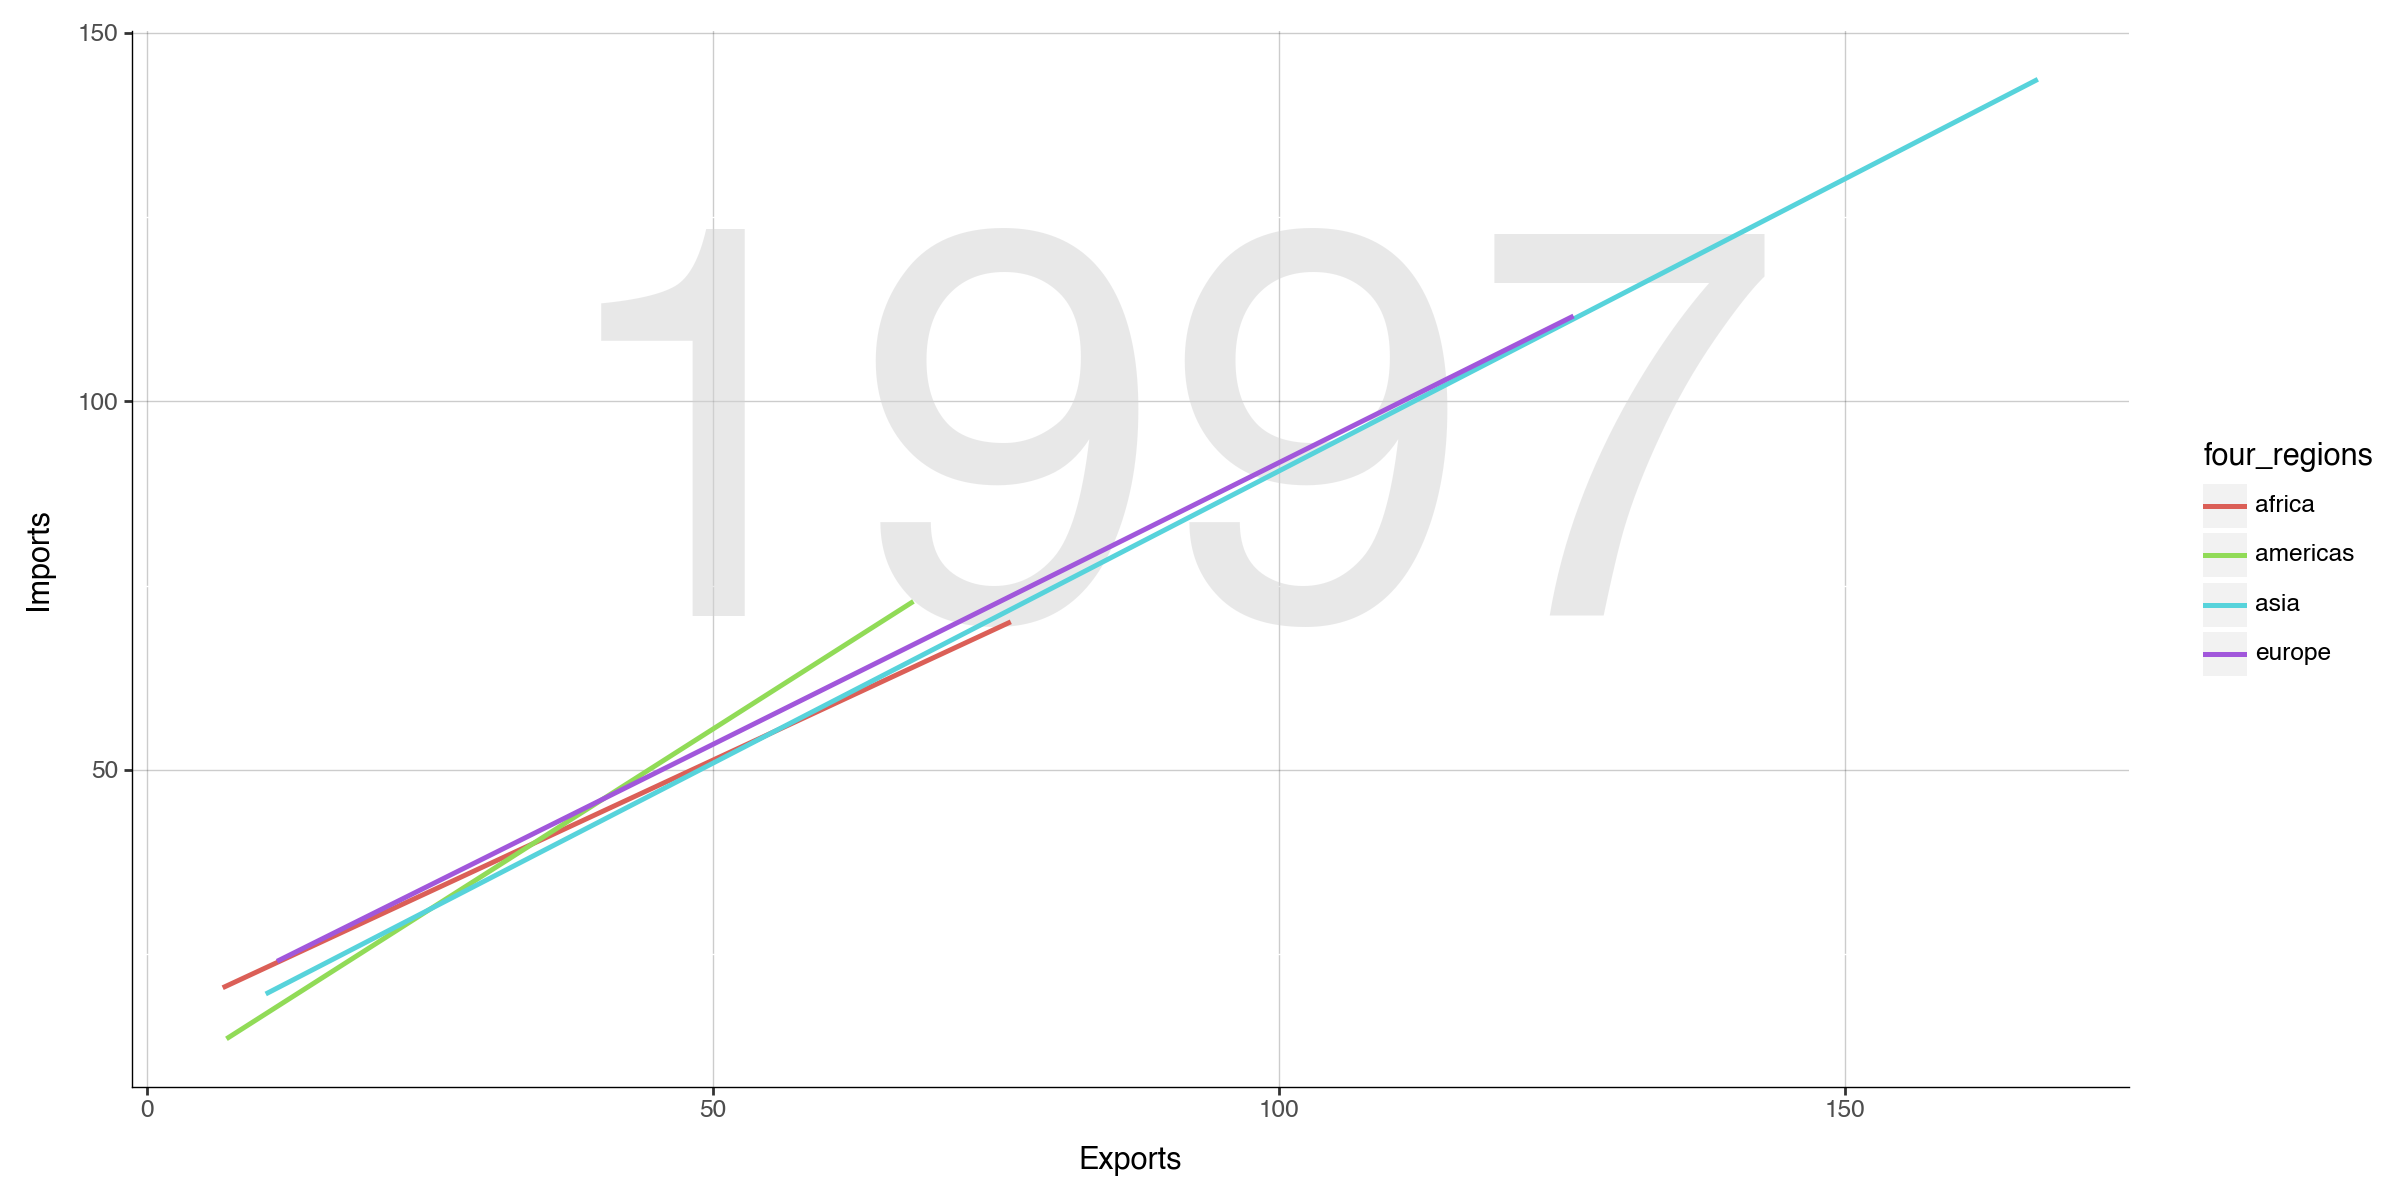

In [429]:
x_breaks = list(map(lambda x: x * 20, range(1, 13)))
y_breaks = list(map(lambda y: y * 50, range(0, 9)))


(ggplot(d2, aes(x='exports', y='imports', size='energy', fill='four_regions')) +
                annotate('text', x=90, y=90, label='1997', size=200, color='lightgray', alpha=0.5) +
                geom_smooth( aes(color='four_regions'),method='lm', se=False) + 
                scale_fill_manual(values=color_mapping) + 
                scale_size(range=(2,12)) + 
                
                guides(size=False) +

 # Control bubble size range
                labs(x="Exports",
                     y="Imports",
                     size="Population",
                     ) +
                # theme_minimal()+
                # theme(figure_size=(12, 6))
                theme(
                    figure_size=(12, 6), 
                    panel_background=element_blank(),  # Remove the panel background
                    axis_line=element_line(color='black', size=0.5),
                    panel_grid_major_x= element_line(color='black', size=0.5, alpha = .2),
                    panel_grid_major_y=element_line(color='black', size=0.5, alpha = .2),
                    )
    )

# Task 3

**Getting the q3data**

In [443]:
d3  = pd.read_csv('/Users/benji/Documents/Machine Learning/Data/q3data.csv')
d3

,internet_users,gdp,income,year,country,four_regions,six_regions,eight_regions,world_bank_region
0,0.00456,330.0,1190.0,2001,Afghanistan,asia,south_asia,asia_west,South Asia
1,0.39000,2570.0,6780.0,2001,Albania,europe,europe_central_asia,europe_east,Europe & Central Asia
2,1.59000,3770.0,9230.0,2001,Algeria,africa,middle_east_north_africa,africa_north,Middle East & North Africa
3,NaN,10500.0,NaN,2001,American Samoa,NaN,NaN,NaN,NaN
4,11.30000,42600.0,35600.0,2001,Andorra,europe,europe_central_asia,europe_west,Europe & Central Asia
...,...,...,...,...,...,...,...,...,...
210,1.85000,847.0,3270.0,2001,Vietnam,asia,east_asia_pacific,east_asia_pacific,East Asia & Pacific
211,27.50000,36700.0,NaN,2001,Virgin Islands (U.S.),NaN,NaN,NaN,NaN
212,0.51900,1190.0,4940.0,2001,Yemen,asia,middle_east_north_africa,asia_west,Middle East & North Africa
213,0.47800,991.0,2080.0,2001,Zambia,africa,sub_saharan_africa,africa_sub_saharan,Sub-Saharan Africa


**Removing the null values**

In [353]:
d3.dropna(inplace = True)

**Ploting the garph**

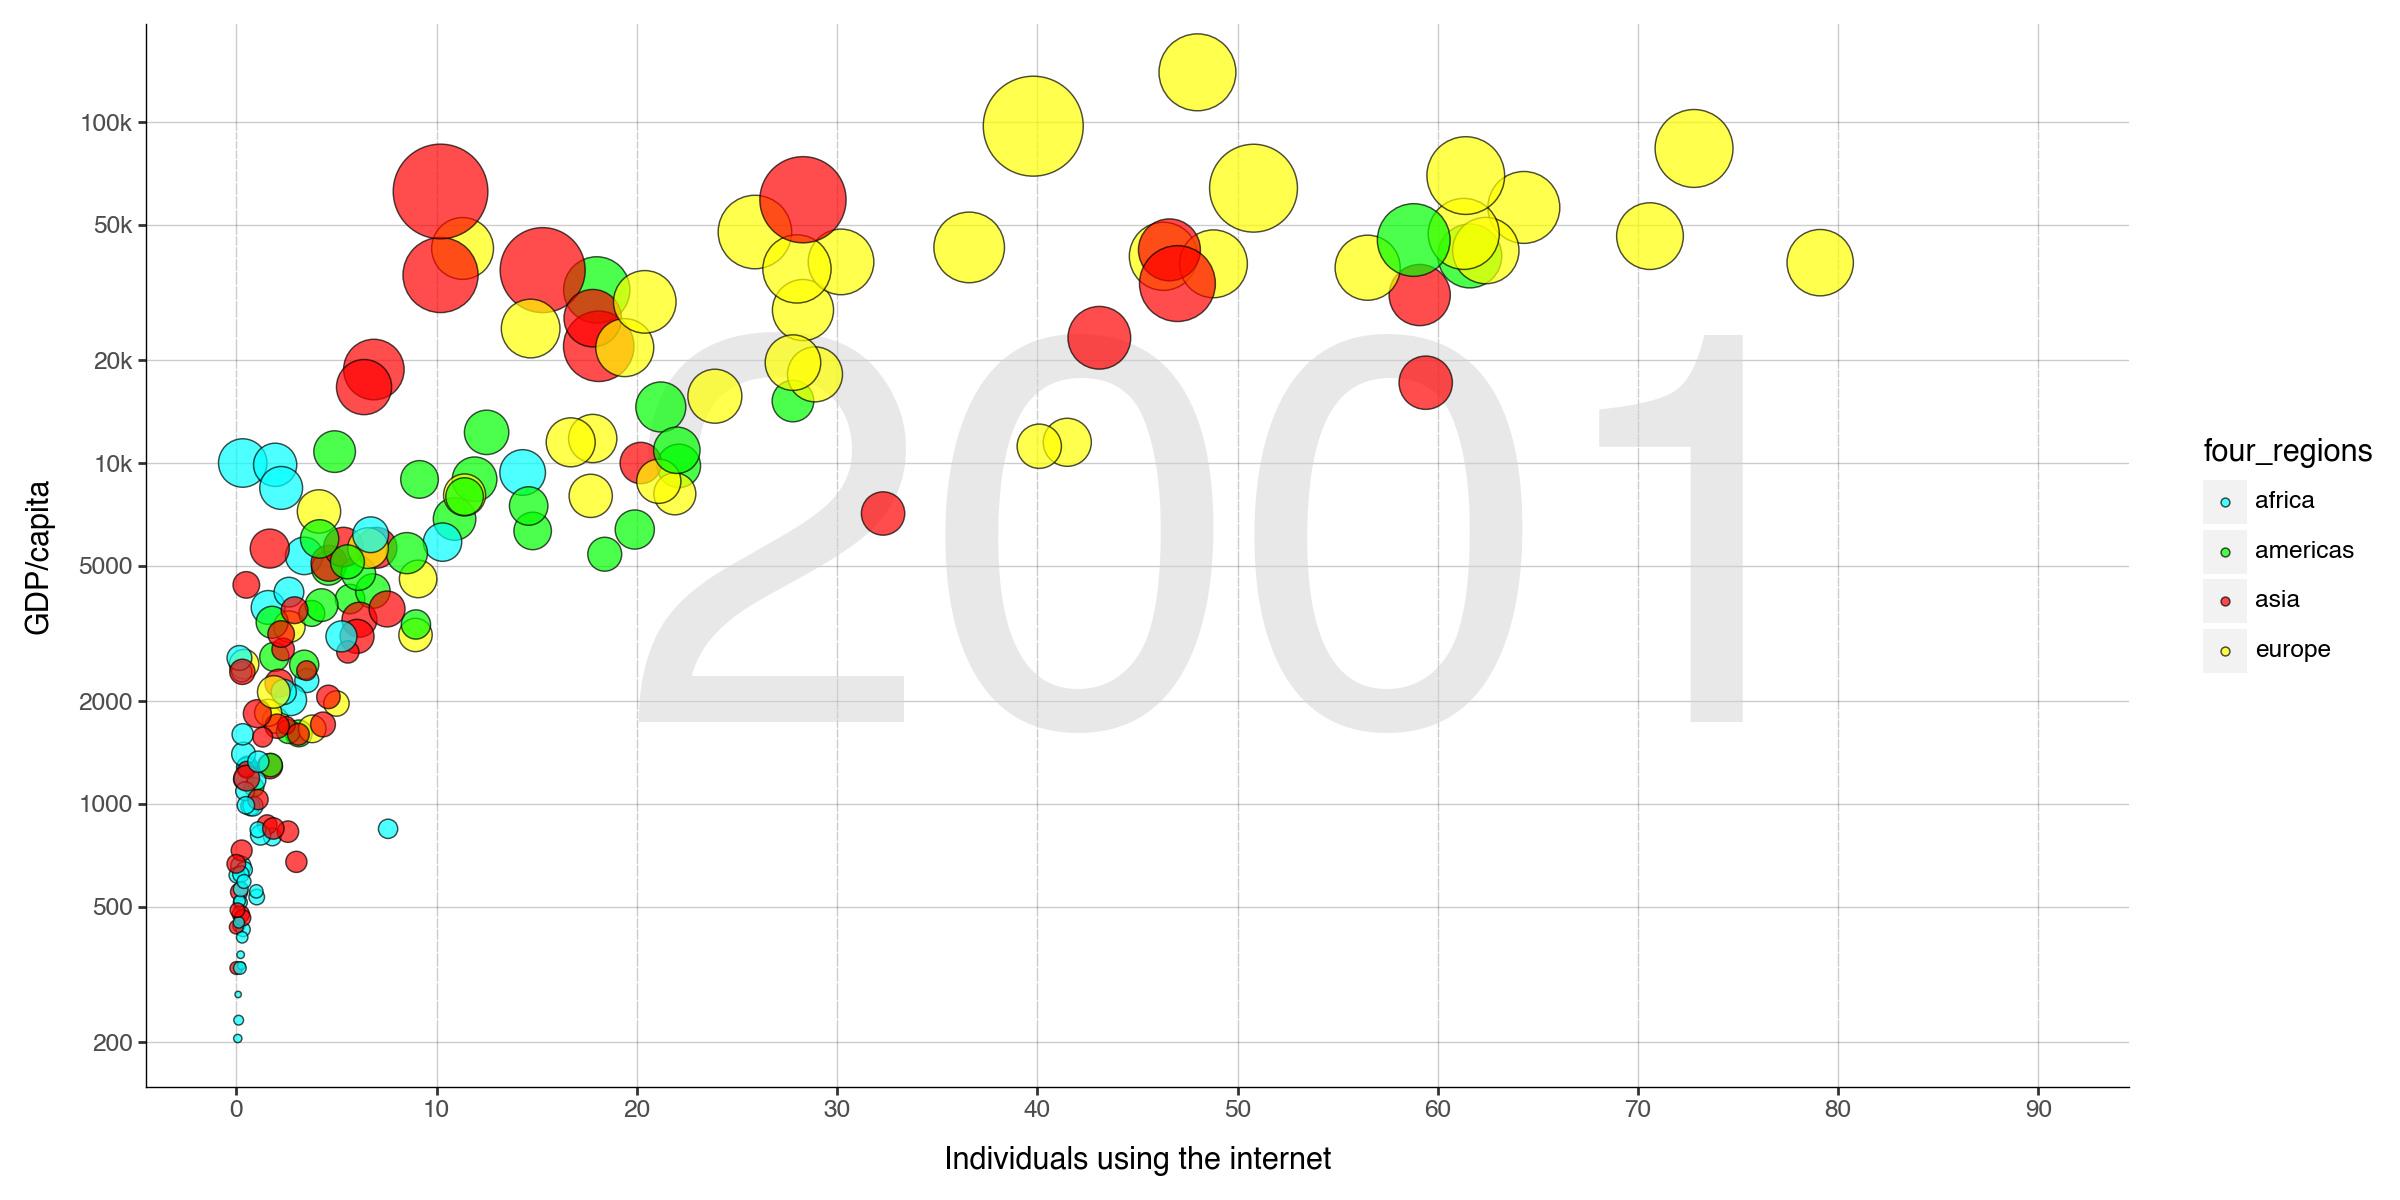

In [423]:
(ggplot(d3, aes(x='internet_users', y='gdp', size='income', fill='four_regions')) +
                annotate('text', x=50, y=4500, label='2001', size=200, color='lightgray', alpha=0.5) +
                geom_point(alpha=0.7,stroke=0.3, color='black') +
                scale_fill_manual(values=color_mapping) + 
                scale_size(range=(1,20)) + 
                scale_x_continuous(breaks=list(map(lambda x: x * 10, range(0, 10))),
                                   limits=(0,90)) +
                scale_y_log10(breaks =  [200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000],
                    labels = ['200', '500', '1000', '2000', '5000', '10k', '20k', '50k', '100k']) +
                    

                labs(x="Individuals using the internet",
                     y="GDP/capita",
                     size="income",) +
                guides(size=False) +
                theme(
                    figure_size=(12, 6), 
                    panel_background=element_blank(),  # Remove the panel background
                    axis_line=element_line(color='black', size=0.5),
                    panel_grid_major_x= element_line(color='black', size=0.5, alpha = .2),
                    panel_grid_major_y=element_line(color='black', size=0.5, alpha = .2),
                    )
    )

### Alternative plot Idea

We can crate a box plot this data but we can't do much with that as we don't get any better inference from it. We can se there are no outliers in europe that is interting I guess.

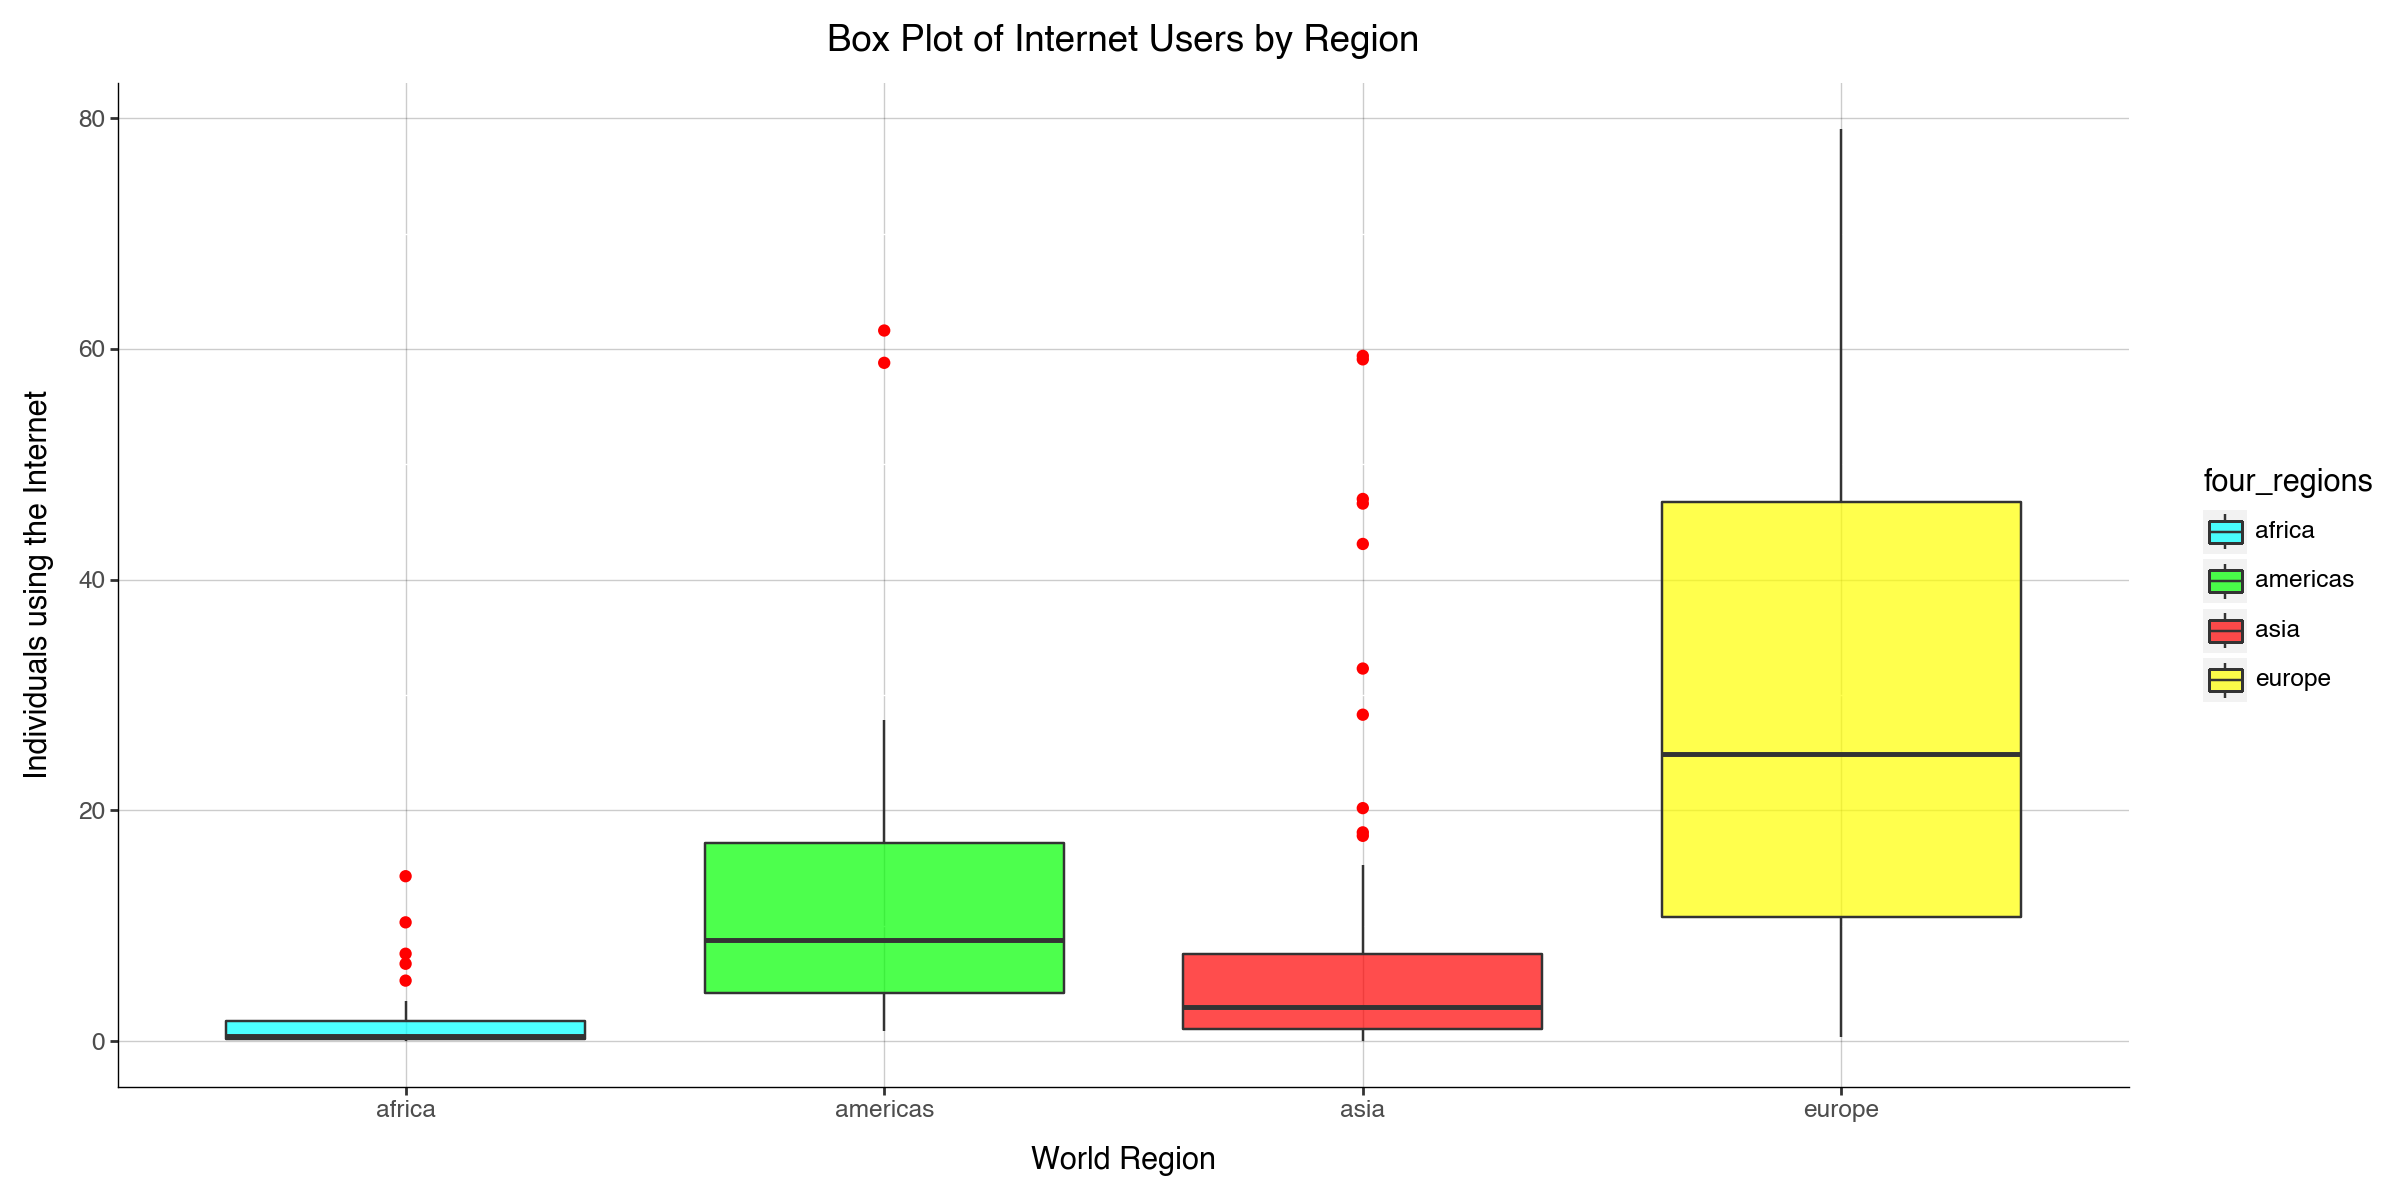

In [434]:
(ggplot(d3, aes(x='four_regions', y='internet_users', fill='four_regions')) +
    geom_boxplot(alpha=0.7, outlier_color='red') +  # Create box plot with red outliers
    scale_fill_manual(values=color_mapping) + 
    labs(x="World Region", y="Individuals using the Internet", title="Box Plot of Internet Users by Region") +
    theme(
        figure_size=(12, 6), 
        panel_background=element_blank(),
        axis_line=element_line(color='black', size=0.5),
        panel_grid_major_x=element_line(color='black', size=0.5, alpha=0.2),
        panel_grid_major_y=element_line(color='black', size=0.5, alpha=0.2),
    )
)
